<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [2]:
import pandas as pd
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
# A:
df = pd.read_csv(sac_csv)
df.shape

(985, 12)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [5]:
for i in df.columns:
    u = df[i].unique()
    print('{} is unique: {}'.format(u, df[i].is_unique))

['3526 HIGH ST' '51 OMAHA CT' '2796 BRANCH ST' '2805 JANETTE WAY'
 '6001 MCMAHON DR' '5828 PEPPERMILL CT' '6048 OGDEN NASH WAY'
 '2561 19TH AVE' '11150 TRINITY RIVER DR Unit 114' '7325 10TH ST'
 '645 MORRISON AVE' '4085 FAWN CIR' '2930 LA ROSA RD' '2113 KIRK WAY'
 '4533 LOCH HAVEN WAY' '7340 HAMDEN PL' '6715 6TH ST'
 '6236 LONGFORD DR Unit 1' '250 PERALTA AVE' '113 LEEWILL AVE'
 '6118 STONEHAND AVE' '4882 BANDALIN WAY' '7511 OAKVALE CT' '9 PASTURE CT'
 '3729 BAINBRIDGE DR' '3828 BLACKFOOT WAY' '4108 NORTON WAY'
 '1469 JANRICK AVE' '9861 CULP WAY' '7825 CREEK VALLEY CIR'
 '5201 LAGUNA OAKS DR Unit 140' '6768 MEDORA DR' '3100 EXPLORER DR'
 '7944 DOMINION WAY' '5201 LAGUNA OAKS DR Unit 162' '3920 SHINING STAR DR'
 '5031 CORVAIR ST' '7661 NIXOS WAY' '7044 CARTHY WAY' '2442 LARKSPUR LN'
 '4800 WESTLAKE PKWY Unit 2109' '2178 63RD AVE' '8718 ELK WAY'
 '5708 RIDGEPOINT DR' '7315 KOALA CT' '2622 ERIN DR' '8421 SUNBLAZE WAY'
 '7420 ALIX PKWY' '3820 NATOMA WAY' '4431 GREEN TREE DR' '9417 SARA ST'

In [6]:
df.drop(df.index[703],inplace=True)
df.drop(['latitude','longitude','zip','state'], axis=1, inplace=True)
df.drop((df.loc[df['sq__ft']==0]).index, inplace=True)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [7]:
df

,street,city,beds,baths,sq__ft,type,sale_date,price
0,3526 HIGH ST,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222
1,51 OMAHA CT,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212
2,2796 BRANCH ST,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880
3,2805 JANETTE WAY,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307
4,6001 MCMAHON DR,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900
...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425
981,6932 RUSKUT WAY,SACRAMENTO,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000
983,8304 RED FOX WAY,ELK GROVE,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [8]:
# A:
X = df[['beds','baths','sq__ft']]
y = df[['price']]

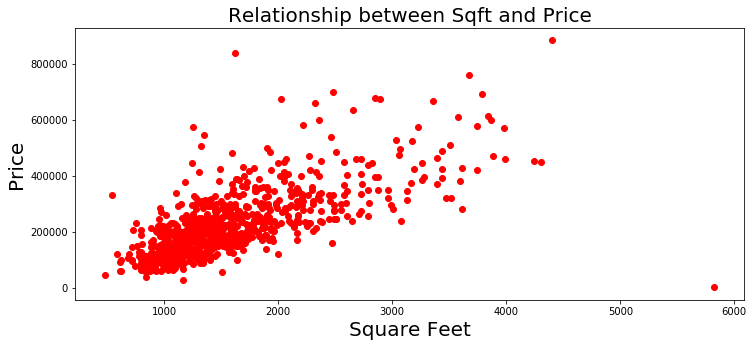

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
lm = LinearRegression()
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
ax.scatter(df[['sq__ft']],y,c='r');
ax.set_xlabel('Square Feet',fontsize=20);
ax.set_ylabel('Price',fontsize=20);
ax.set_title('Relationship between Sqft and Price',fontsize=20);

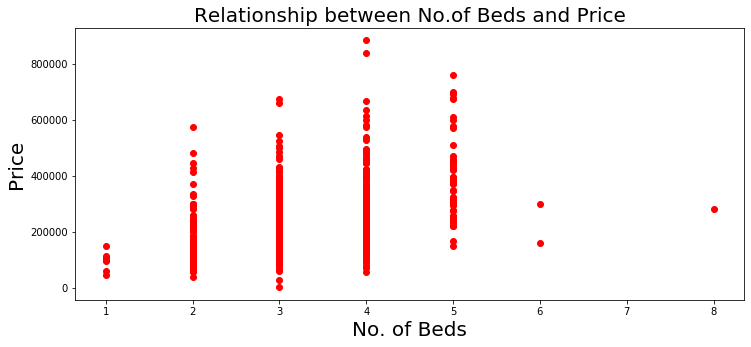

In [10]:
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
ax.scatter(df[['beds']],y,c='r');
ax.set_xlabel('No. of Beds',fontsize=20);
ax.set_ylabel('Price',fontsize=20);
ax.set_title('Relationship between No.of Beds and Price',fontsize=20);

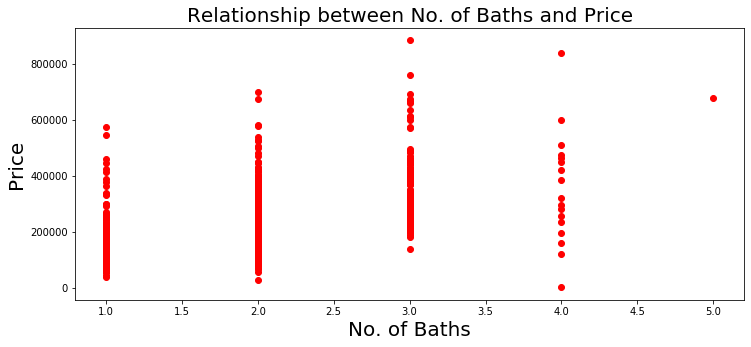

In [11]:
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
ax.scatter(df[['baths']],y,c='r');
ax.set_xlabel('No. of Baths',fontsize=20);
ax.set_ylabel('Price',fontsize=20);
ax.set_title('Relationship between No. of Baths and Price',fontsize=20);

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [12]:
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [13]:
# A: The variable square feet will be the best predictor of Y in an SLR model because it clearly shows that it is positively correlated with the price.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [89]:
import numpy as np 

x = ['sq__ft']
y = ['price']

def slope_intercept(x,y):
    for x in x:
        y_bar = df[y].mean()
        x_bar = df[x].mean()
        std_y = np.std(df[y], ddof=1)
        std_x = np.std(df[x], ddof=1)
        r_xy =  df.corr().loc[x,y]

        beta_1 = r_xy*(std_y/std_x)
        beta_0 = y_bar-beta_1*x_bar
        print('Slope',beta_1)
        print('Intercept',beta_0)


In [90]:
slope_intercept(x,y)

Slope price    125.314183
dtype: float64
Intercept price    29984.361727
dtype: float64


### 6. Interpret the intercept. Interpret the slope.

In [16]:
# The slope is the coefficient of the respective X
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [17]:
# A:
X = df[['beds','baths','sq__ft']].values
y = df['price']

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# print(predictions) Represents all the values that are predicted for this model
# print(score) Represents the R-squared which is the range of variance that fits the model
# print(model.coef_) Represents the respective coefficients for x1,x2,x3

In [18]:
print(predictions)
print(score)

[139701.06700203 171670.92098768 134398.87047382 141821.94561332
 134531.42538702 165705.94989344 167917.32259197 172996.47011973
 158216.69402482 173484.62894659 142069.11451692 192439.98153496
 156246.31124955 152185.34874649 168953.64199446 183799.79227346
 140761.50630767 134266.31556061 106827.4485271  201321.16071972
 169773.09137684 185836.35577785 174038.96850257 233797.11445504
 141008.67521128 165796.44398068 144629.71869378 169905.64629005
 192596.65635132 187005.23009354 171207.07551895 174279.95842583
 204502.47863665 169507.98155043 171207.07551895 209539.56533846
 165001.11450145 204791.70836622 161578.80666126 141532.71588375
 206334.12751837 181570.47865212 161554.68675811 171737.29517177
 220035.52338483 153535.0177817  219107.6389924  264218.37030819
 229181.81239601 217360.30521757 179051.93530122 220433.18812445
 215504.5364327  236869.99736192 178654.2705616  207948.90637999
 267225.07248595 176931.05668993 169682.5972896  259627.38160728
 182630.91795776 171363.7

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

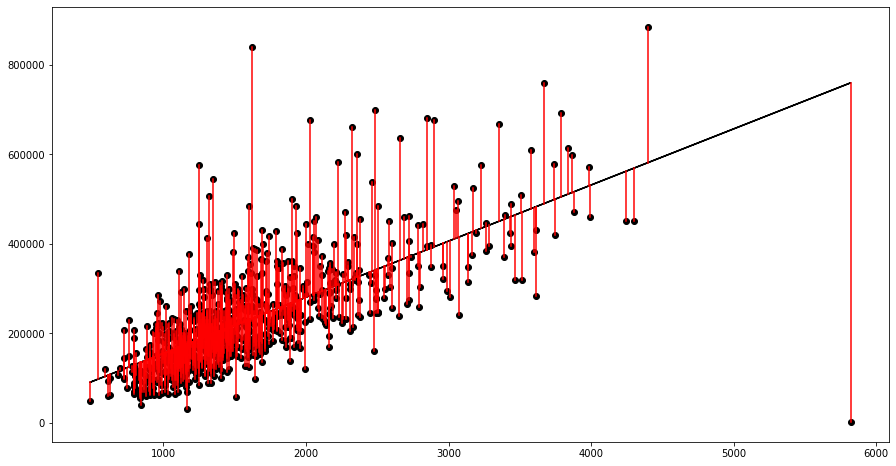

In [35]:
# A:
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

ax = fig.gca()

df['Linear_Yhat'] = 29984.361727 + 125.314183 * df['sq__ft']

ax.scatter(x=df['sq__ft'], y=df['price'], c='k')
ax.plot(df['sq__ft'], df['Linear_Yhat'], color='k');

for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Linear_Yhat']), 'r-')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [25]:
# A:
d = pd.get_dummies(df['type'])
d

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
980,0,0,1
981,0,0,1
982,0,0,1
983,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [26]:
# A:
combined = pd.concat([df,d],axis=1)
combined.head()

,street,city,beds,baths,sq__ft,type,sale_date,price,Linear_Yhat,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,134747.018715,0,0,1
1,51 OMAHA CT,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,176226.013288,0,0,1
2,2796 BRANCH ST,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,129734.451395,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,136752.045643,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,129859.765578,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [27]:
huge = pd.get_dummies(df['sq__ft'] > 3775)
combined['Huge'] = huge[True]
combined.head()

,street,city,beds,baths,sq__ft,type,sale_date,price,Linear_Yhat,Condo,Multi-Family,Residential,Huge
0,3526 HIGH ST,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,134747.018715,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,176226.013288,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,129734.451395,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,136752.045643,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,129859.765578,0,0,1,0


In [28]:
# A:
X = combined[['Condo','Multi-Family','Residential','sq__ft']]
y = combined[['price']]
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.48750860718252914

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [29]:
np.max(y)

price    884790
dtype: int64

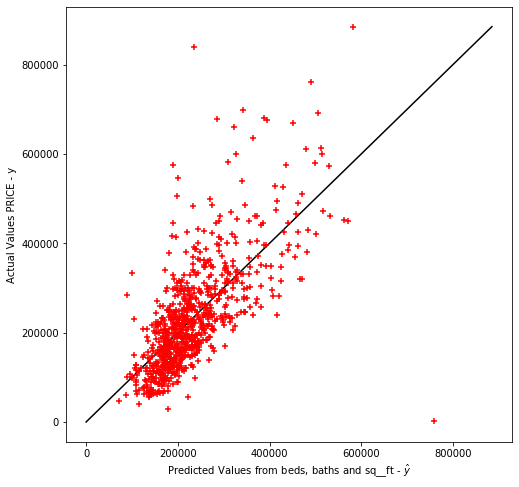

score:  0.4848293402207819


In [59]:
# A:
plt.figure(figsize=(8,8))
plt.scatter(model.predict(X), y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from beds, baths and sq__ft - $\hat{y}$")
plt.ylabel("Actual Values PRICE - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')


plt.show()

print("score: ", score)

IndexError: arrays used as indices must be of integer (or boolean) type

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [25]:
# A:
# Linearity: Y must have an approximately linear relationship with each independent X_i.
# I believe this assumption met my model because as sq__ft increases, price increases, and shows a positive correlation.

# Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j
# I believe this assumption met my model because the numbers of beds and baths do not affect the sq__ft and they are independent.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [26]:
# A:
import statsmodels.api as sm

X = df[['sq__ft','beds']].values
X = sm.add_constant(X)
y = df['price']

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     380.7
Date:                Fri, 15 Nov 2019   Prob (F-statistic):          2.74e-117
Time:                        09:22:16   Log-Likelihood:                -10391.
No. Observations:                 813   AIC:                         2.079e+04
Df Residuals:                     810   BIC:                         2.080e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.985e+04    1.2e+04      4.151      0.000    2.63e+04    7.34e+04
x1           134.9762      6.345     21.272      0.000     122.521     147.431
x2         -1.085e+04   4961.889     -2.188      0.029   -2.06e+04   -1114.623
==============================================================================
Omnibus:                      216.818   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6615.252
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                      16.935   Cond. No.                     7.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [27]:
# A:
def r2_adj(R_squared, No_observation, Df_model):
    n = (1-R_squared)*(No_observation-1)
    d = (No_observation-Df_model-1)
    t = n/d
    a = 1-t
    return a
r2_adj(0.485,813,2)

0.4837283950617284

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [56]:
# A:
def six_regression_metrics(true_y,predict_y):
    import sklearn
    r2_mean = sklearn.metrics.r2_score(true_y,predict_y)
    mse_mean = sklearn.metrics. mean_squared_error(true_y,predict_y)
    rmse_mean = (sklearn.metrics.mean_absolute_error(true_y,predict_y))**0.5
    mae_mean = sklearn.metrics.mean_absolute_error(true_y,predict_y)
    msle_mean = sklearn.metrics.mean_squared_log_error(true_y,predict_y)
    mean_mean = np.mean(true_y)
    print('The R-Squared is ',r2_mean)
    print('The Mean Squared Error is ',mse_mean)
    print('The Root Mean Squared Error is ',rmse_mean)
    print('The Mean Absolute Error is ',mae_mean)
    print('The Mean Squared Log Error is ',msle_mean)
    print('The Mean is ',mean_mean)

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [57]:
# A:
six_regression_metrics(y,predictions)

The R-Squared is  0.48482934022078183
The Mean Squared Error is  7396689989.515358
The Root Mean Squared Error is  244.35268589630664
The Mean Absolute Error is  59708.2351047391
The Mean Squared Log Error is  0.16897364425275446
The Mean is  price    229471.130381
dtype: float64


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [60]:
# A: 
# I think my model is in the sweet spot because adjusted R-squared is not too high or too low but around 0.48
# This means that if adjusted R-squared is too low, it is underfitting as the predictions keep predicting the same value.
# If adjusted R-squared is too high, it is overfitting as the predictions are too far spread.
# My RMSE is 244.35 and mean is 229471.13, the RMSE is not too large to cos a high bias, therefore it is in the sweetspot.